ASSIGNMENT

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [68]:
df=pd.read_csv("/content/drive/MyDrive/ML/Class4/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

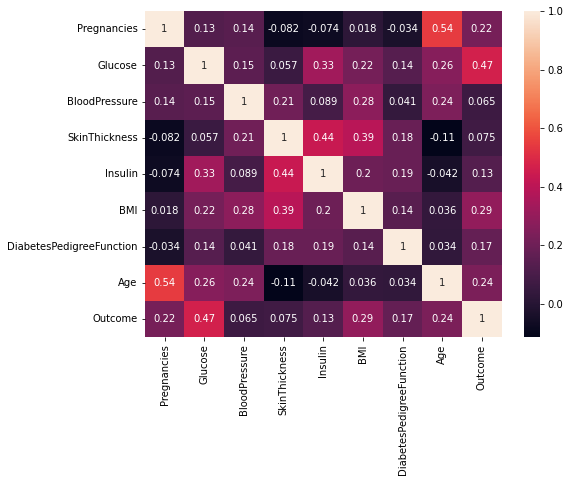

In [70]:
plt.figure(figsize = (8, 6))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [71]:
zero_remove = ["Glucose","BloodPressure","SkinThickness"]

for c in zero_remove:
    df[c] = df[c].replace(0, np.NaN)
    mean = int(df[c].mean(skipna = True))
    df[c] = df[c].replace(np.NaN, mean)

In [72]:
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [73]:
model = svm.SVC(kernel = 'linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


In [75]:
pred = model.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



In [76]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[96 11]
 [19 28]]


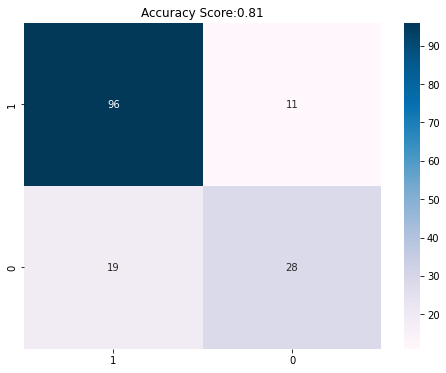

In [77]:
outcome = df['Outcome'].unique()
cm = pd.DataFrame(conf_mat, outcome, outcome)
plt.figure(figsize = (8, 6))
plt.title('Accuracy Score:{0:.2f}'.format(accuracy_score(y_test, pred)))
sns.heatmap(cm, annot = True, cmap = 'PuBu')
plt.show()